## QUESTION 1

We have two matrices: an expression matrix, and a matrix about the group information of cells			
Write a program using your preferred programming language to calculate the mean of each gene in each group			
1. Group mean			
2. T-test DE			
3. Heatmap (2D clustering)			
4. Barplot (Bonus with error bar)			
5. Bonus: Plot whatever you want		

In [226]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shiva\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [227]:
import pandas as pd

mat=pd.read_csv('Data.csv', index_col=0)
mat.shape

(10, 6)

In [228]:
mat.head()

,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6
Name,,,,,,
GeneA,3.710701,3.423022,24.012434,0.196969,0.000000,0.070232
GeneB,6.157846,3.521709,11.040904,1.864381,0.856896,1.173653
GeneC,10.123089,6.693262,8.929486,4.264959,3.809895,4.503559
GeneD,1.733950,1.130589,3.086674,0.680610,0.128341,0.123868
GeneE,3.106349,2.698788,3.743998,0.796102,0.772676,1.627380


In [229]:
mat.mean(axis=1)

Name
GeneA    5.235560
GeneB    4.102565
GeneC    6.387375
GeneD    1.147339
GeneE    2.124216
GeneF    3.019405
GeneG    4.330656
GeneH    3.086185
GeneI    9.977445
GeneJ    5.948201
dtype: float64

### 1. GROUP MEAN

Cells 1, 5 and 6 belong to Group A

In [230]:
groupA=mat[['Cell1','Cell5','Cell6']]
groupA

,Cell1,Cell5,Cell6
Name,,,
GeneA,3.710701,0.000000,0.070232
GeneB,6.157846,0.856896,1.173653
GeneC,10.123089,3.809895,4.503559
GeneD,1.733950,0.128341,0.123868
GeneE,3.106349,0.772676,1.627380
GeneF,2.649048,0.644167,0.407211
GeneG,6.671137,2.980256,3.420434
GeneH,4.797332,2.334520,1.814361
GeneI,17.660772,1.356109,6.319940


Cells 2, 3 and 4 belong to Group B

In [231]:
groupB=mat[['Cell2','Cell3','Cell4']]
groupB

,Cell2,Cell3,Cell4
Name,,,
GeneA,3.423022,24.012434,0.196969
GeneB,3.521709,11.040904,1.864381
GeneC,6.693262,8.929486,4.264959
GeneD,1.130589,3.086674,0.680610
GeneE,2.698788,3.743998,0.796102
GeneF,2.671041,11.174323,0.570643
GeneG,5.213023,5.435889,2.263195
GeneH,3.091814,4.345625,2.133458
GeneI,13.809408,18.414341,2.304101


In [232]:
A=groupA.mean(axis=1)
print('\033[1m'+"MEAN GENE EXPRESSION LEVELS FOR GROUP A")
A

MEAN GENE EXPRESSION LEVELS FOR GROUP A


Name
GeneA    1.260311
GeneB    2.729465
GeneC    6.145514
GeneD    0.662053
GeneE    1.835469
GeneF    1.233475
GeneG    4.357276
GeneH    2.982071
GeneI    8.445607
GeneJ    5.360589
dtype: float64

In [233]:
print('\033[1m'+"GROUP A MEAN")
A.mean()

GROUP A MEAN


3.5011829909999994

In [234]:
B=groupB.mean(axis=1)
print('\033[1m'+"MEAN GENE EXPRESSION LEVELS FOR GROUP B")
B

MEAN GENE EXPRESSION LEVELS FOR GROUP B


Name
GeneA     9.210809
GeneB     5.475665
GeneC     6.629236
GeneD     1.632624
GeneE     2.412962
GeneF     4.805336
GeneG     4.304036
GeneH     3.190299
GeneI    11.509283
GeneJ     6.535814
dtype: float64

In [235]:
print('\033[1m'+"GROUP B MEAN")
B.mean()

GROUP B MEAN


5.570606283666668

In [236]:
groups=[A,B]
AB=pd.concat(groups, axis=1, keys=['GroupA','GroupB'])
AB

,GroupA,GroupB
Name,,
GeneA,1.260311,9.210809
GeneB,2.729465,5.475665
GeneC,6.145514,6.629236
GeneD,0.662053,1.632624
GeneE,1.835469,2.412962
GeneF,1.233475,4.805336
GeneG,4.357276,4.304036
GeneH,2.982071,3.190299
GeneI,8.445607,11.509283


### 2. T-TEST

In [237]:
from scipy.stats import ttest_ind
print('\033[1m'+"T-TEST STATISTIC IS AS FOLLOWS:")
ttest_ind(A,B)

T-TEST STATISTIC IS AS FOLLOWS:


Ttest_indResult(statistic=-1.6509440539425169, pvalue=0.11608896319564381)

### 3. HEATMAP (2D-CLUSTERING)

Text(697.1249999999999, 0.5, 'Gene')

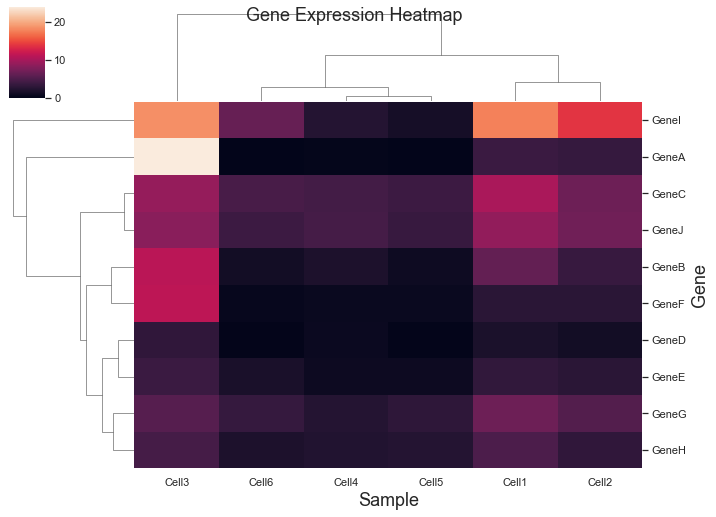

In [238]:
import seaborn as sns
import matplotlib.pylab as plt
HM=sns.clustermap(mat,figsize=(10, 7))
HM.fig.suptitle('Gene Expression Heatmap', fontsize=18) 
HM.ax_heatmap.set_xlabel("Sample", fontsize=18)
HM.ax_heatmap.set_ylabel("Gene", fontsize=18)

### 4. BAR PLOT (WITH ERROR BAR)

In [239]:
df=pd.DataFrame(AB)
ABT=df.transpose()
ABT


Name,GeneA,GeneB,GeneC,GeneD,GeneE,GeneF,GeneG,GeneH,GeneI,GeneJ
GroupA,1.260311,2.729465,6.145514,0.662053,1.835469,1.233475,4.357276,2.982071,8.445607,5.360589
GroupB,9.210809,5.475665,6.629236,1.632624,2.412962,4.805336,4.304036,3.190299,11.509283,6.535814


Text(0, 0.5, 'Mean Expression')

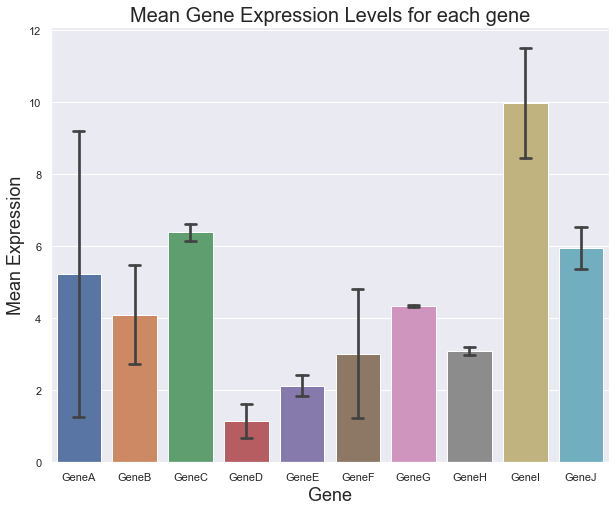

In [240]:
sns.set(rc = {'figure.figsize':(10,8)})
BP1 = sns.barplot(data=ABT,capsize=.2)
BP1.set_title("Mean Gene Expression Levels for each gene", fontsize=20)
BP1.set_xlabel("Gene", fontsize=18)
BP1.set_ylabel("Mean Expression", fontsize=18)

Text(0, 0.5, 'Mean Expression')

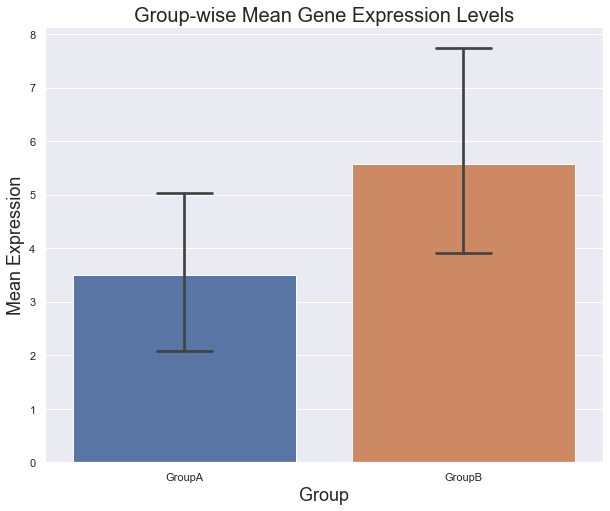

In [241]:
BP2 = sns.barplot(data=AB,capsize=.2)
BP2.set_title("Group-wise Mean Gene Expression Levels", fontsize=20)
BP2.set_xlabel("Group", fontsize=18)
BP2.set_ylabel("Mean Expression", fontsize=18)

Text(0, 0.5, 'Mean Expression')

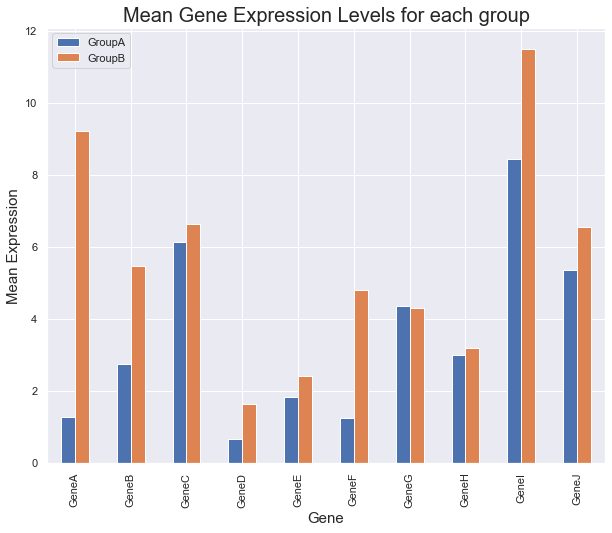

In [242]:
AB.plot.bar()
plt.title("Mean Gene Expression Levels for each group",fontsize=20)
plt.xlabel("Gene",fontsize=15)
plt.ylabel("Mean Expression",fontsize=15)

### 5. SCATTER PLOT

Text(0, 0.5, 'Mean Expression')

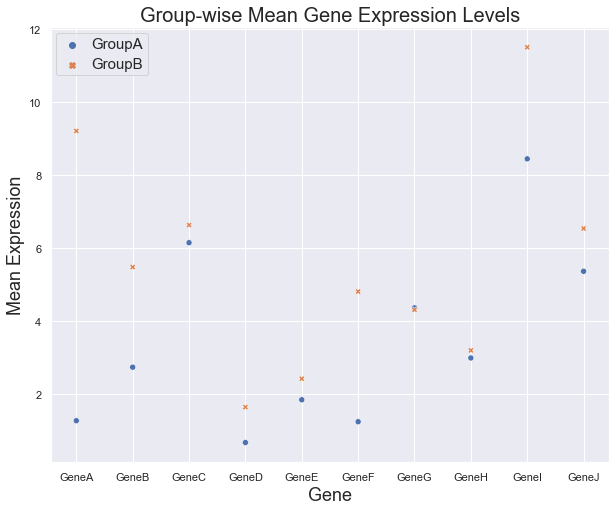

In [243]:
sns.set(rc = {'figure.figsize':(10,8)})
SP=sns.scatterplot(data=AB)
plt.setp(SP.get_legend().get_texts(), fontsize='15') 
SP.set_title("Group-wise Mean Gene Expression Levels", fontsize=20)
SP.set_xlabel("Gene", fontsize=18)
SP.set_ylabel("Mean Expression", fontsize=18)